In [40]:
import pandas as pd
import numpy as np

In [41]:
genderclass=pd.read_csv('gender_classification_v7.csv')
genderclass

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [42]:
genderclass.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(genderclass.drop(columns=['gender']),
                                                    genderclass['gender'],test_size=0.25, 
                                                    random_state=2500)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 3035 to 160
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3750 non-null   int64  
 1   forehead_width_cm          3750 non-null   float64
 2   forehead_height_cm         3750 non-null   float64
 3   nose_wide                  3750 non-null   int64  
 4   nose_long                  3750 non-null   int64  
 5   lips_thin                  3750 non-null   int64  
 6   distance_nose_to_lip_long  3750 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 234.4 KB


In [45]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( random_state=2500)
tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=2500)

In [51]:
test_score = tree.score(X_test, y_test)
print ("The score of the DT model in testing dataset is equal to: "+str(test_score))

The score of the DT model in testing dataset is equal to: 0.9616306954436451


In [52]:
tree_2=DecisionTreeClassifier(max_depth=8, random_state=2500)
tree_2.fit(X_train, y_train)
train_score2 = tree_2.score(X_train, y_train) #returns the mean accuracy
test_score2 = tree_2.score(X_test, y_test)
print ("The score of the DT model in training dataset is equal to: "+str(train_score2))
print ("The score of the DT model in testing dataset is equal to: "+str(test_score2))

The score of the DT model in training dataset is equal to: 0.9850666666666666
The score of the DT model in testing dataset is equal to: 0.9688249400479616


In [26]:
import matplotlib.pyplot as plt

In [27]:
n_features = X_train.shape[1]

In [28]:
np.arange(n_features)

array([0, 1, 2, 3, 4, 5, 6])

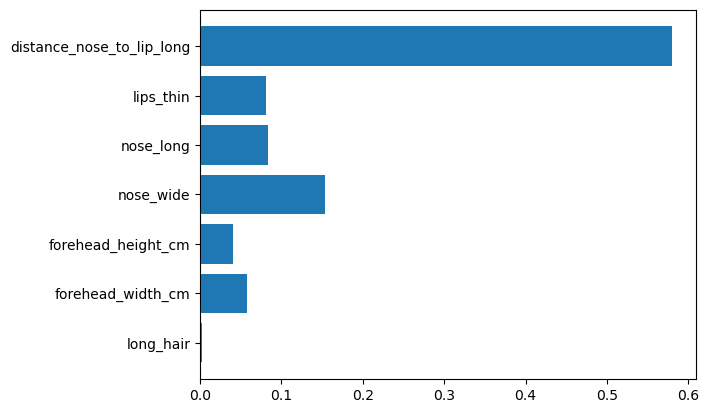

In [53]:
plt.barh(range(n_features), tree.feature_importances_)
plt.yticks(np.arange(n_features), labels=X_train.columns)
plt.show()

In [54]:
from sklearn import metrics 
from sklearn.metrics import classification_report
import seaborn as sns

In [56]:
y_predict = tree.predict(X_test)

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

([<matplotlib.axis.YTick at 0x7fcf793c22b0>,
 [Text(0, 0.5, 'Female'), Text(0, 1.5, 'Male')])

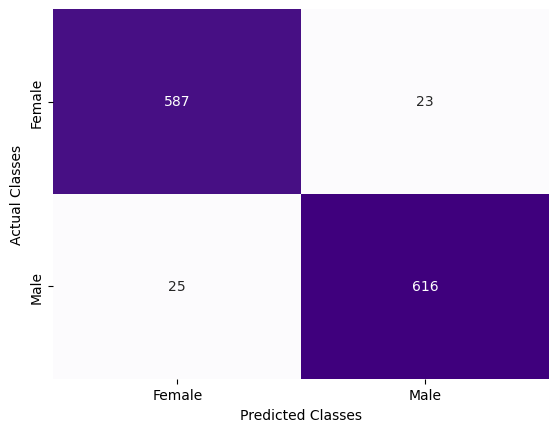

In [58]:
sns.heatmap(confusion_matrix, cmap='Purples', annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.xticks(np.arange(2) + 0.5, ["Female", "Male"])
plt.yticks(np.arange(2) + 0.5, ["Female", "Male"])